# 用语音唤醒虚谷号

作者：谢作如、Adolph_Lin、林淼焱

Snowboy是一款高度可定制的唤醒词检测引擎，可以用于实时嵌入式系统，并且始终监听（即使离线也是可以的）。它可以运行在 （Ubuntu）Linux 和 Mac OS X 系统上，也可以部署在安卓手机和迷你电脑，如树莓派、虚谷号等。

默认情况下，Snowboy并不支持虚谷号。在技术大神Adolph_Lin的帮助，修改版本的Snowboy已经可以完美运行于虚谷号上。同样，新版的虚谷号系统上，也默认安装了Snowboy。

Snowboy官方文档地址 ：http://docs.kitt.ai/snowboy

Snowboy源码下载地址（虚谷号版本）：https://gitee.com/l_wolf/Snowboy.git

## 1.环境配置

在终端运行以下代码，进行第三方依赖库的安装。本案例中所有的操作，都可以用jupyter来完成。jupyter的终端功能值得推荐。

1）安装pulseaudio软件：sudo apt-get install pulseaudio（虚谷号已经预装）

2）安装sox软件：sudo apt-get install sox（虚谷号已经预装）

3）安装 PyAudio：sudo apt-get install python3-pyaudio（虚谷号已经预装）

4）安装atlas矩阵计算库：sudo apt-get install libatlas-base-dev(虚谷号已经预装)

5）安装swig软件：

下载swig（3.0.12）软件,下载地址：https://pan.baidu.com/s/1DC1Gzl-PzvMk50WeFXUZpw 提取码：nckk

通过jupyter上传到虚谷号（也可以直接在虚谷号上下载、安装），安装SWIG命令：sudo dpkg -i swig-3.0.12.deb

注：
    - 直接使用命令安装的是3.0.8版本，版本太低，需要下载安装。
    - 安装时可能会出现错误提示：cc1plus: warning: command line option ‘-Wstrict-prototypes’ is valid for C/ObjC but not for C++，但是不影响使用。

## 2.硬件配置

虚谷号需要购买一个USB声卡，插入虚谷号板子上后，接上麦克风，打开 pulseaudio音量控制-软件设置默认输出和输入设备，如下图所示。
点击`Set as fallback`按钮就可设置成默认输入（麦克风）输出（耳机）设备。

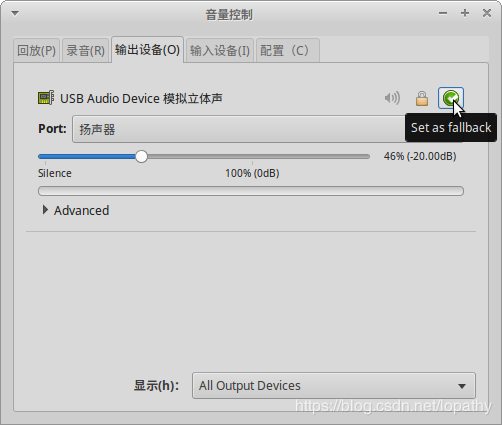

设置完之后，打开终端运行**sox -d -d**命令，对着麦克风说话，喇叭传出你说的话时代表麦克风和音响工作正常。

默认情况下，虚谷号插上USB声卡即可正常工作，不需要另外设置。推荐使用带声卡的摄像头。

## 3.下载snowboy并编译

进行以下步骤前，请注意当前路径，方便之后查找。建议在桌面（Desktop）上安装。

1、获取源码：git clone https://gitee.com/l_wolf/Snowboy.git

2、编译 Python3 绑定：cd Snowboy/swig/Python3 && make

编译完成后如下图所示：

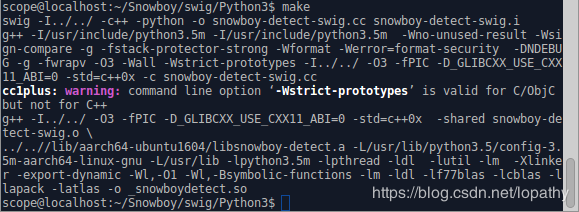

## 4.功能测试

1、进入官方示例目录下: cd Snowboy/examples/Python3

2、运行demo程序：$ python demo.py resources/models/snowboy.umdl

snowboy.umdl文件为语音识别模型，热词内容为“snowboy”。

当我们对着麦克风清晰的说出snowboy，程序识别后，会在终端打印对应的消息，同时喇叭会“叮”的声音发出，那代表snowboy配置成功。测试结果如下图所示：

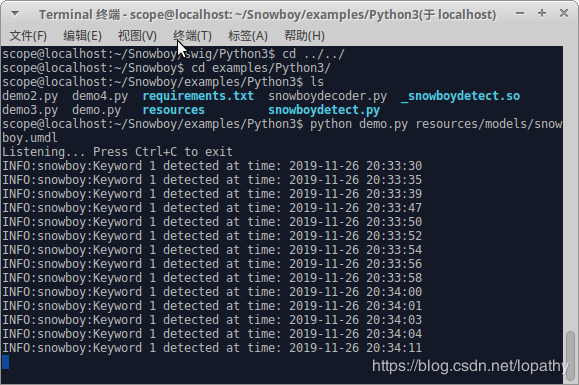

建议在这个文件夹中新建一个`.pynb`文件，将`demo.py`的内容复制进来，再修改代码，这样就不需要用命令行运行了代码了。

`model = sys.argv[1]`改为`model = '../../resources/models/snowboy.umdl'`

注：测试环境需要安静，不要有杂音。

## 5.参数说明

#### 敏感度

如果因为英语口音等原因影响了识别的内容，可以在刚才运行的demo.py中找到以下代码，修改其中的sensitivity敏感度，增加敏感度后会更容易识别：

**detector = snowboydecoder.HotwordDetector(model, sensitivity=0.8)**

#### 反馈

要修改唤醒后的反馈内容，可以修改`detector.start`后面括号中的参数。
```
detector.start(detected_callback=snowboydecoder.play_audio_file,
               interrupt_check=interrupt_callback,
               sleep_time=0.03)
               
```
如**detected_callback=snowboydecoder.play_audio_file**表示唤醒后播放声音。可以改为`detected_callback=detectedCallback`，然后写一个回调函数`detectedCallback`，如：

```
def detectedCallback():
    snowboydecoder.play_audio_file(snowboydecoder.DETECT_DING)
    print('recording audio...')
```


## 6.模型训练

我们可以登陆snowboy官网，设置自己的唤醒词，上传包含自定义唤醒词的音频，以训练生成专属的语音模型。

1）登录网站

https://snowboy.kitt.ai/activities

建议用github的账号登录。

2）在Hotword library（热词库）中找“虚谷号”。

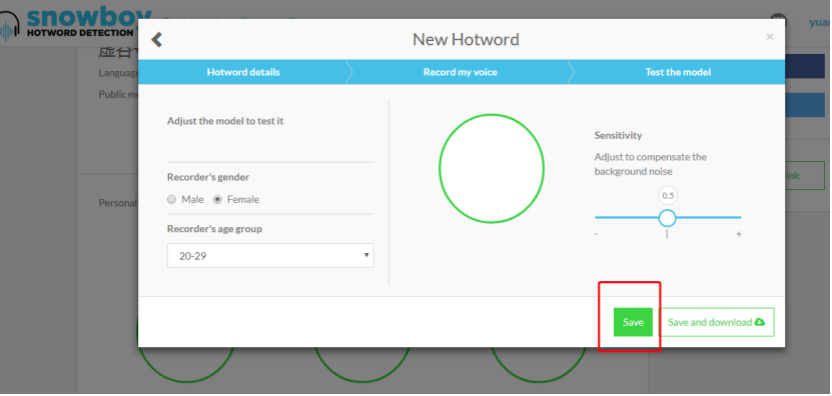

3）进入“虚谷号”词条后，点击“Record and download the model”，按照提示，测试三次语音后，下载模型即可。

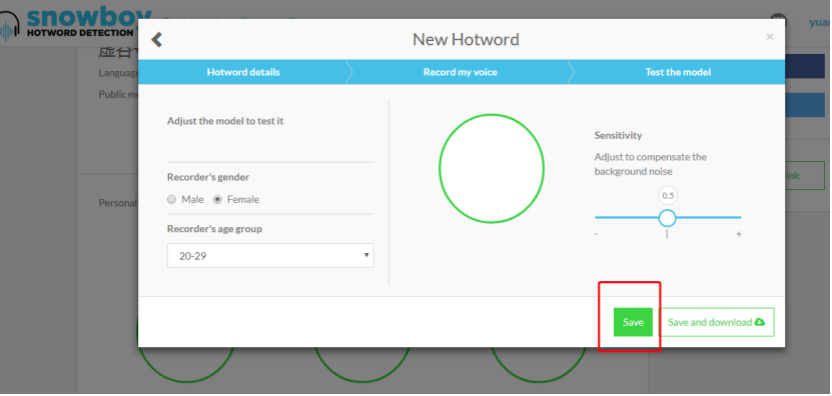

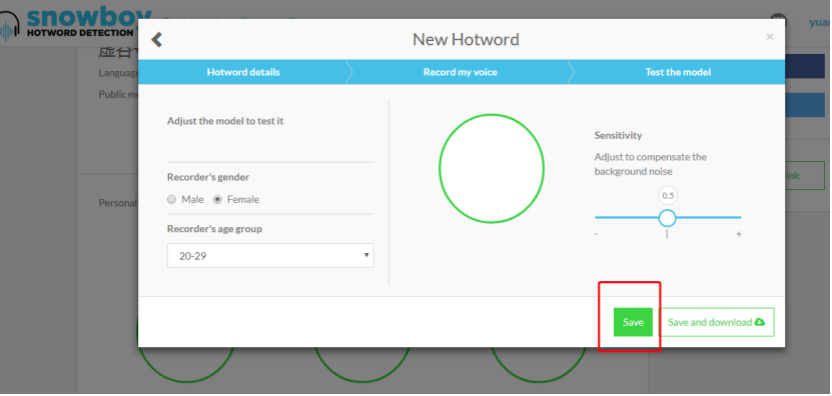

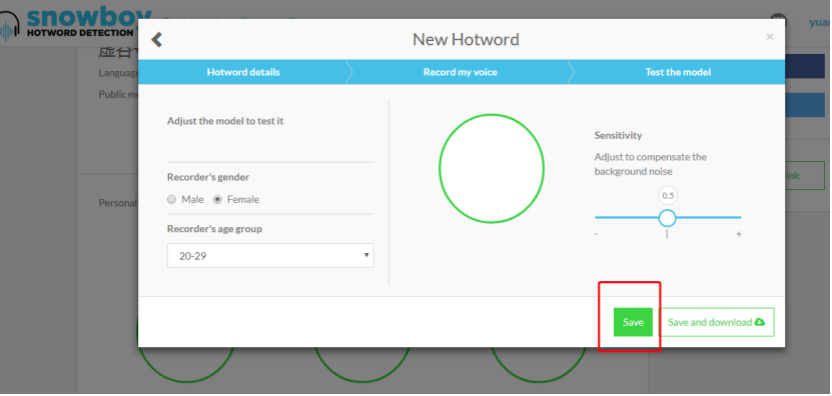

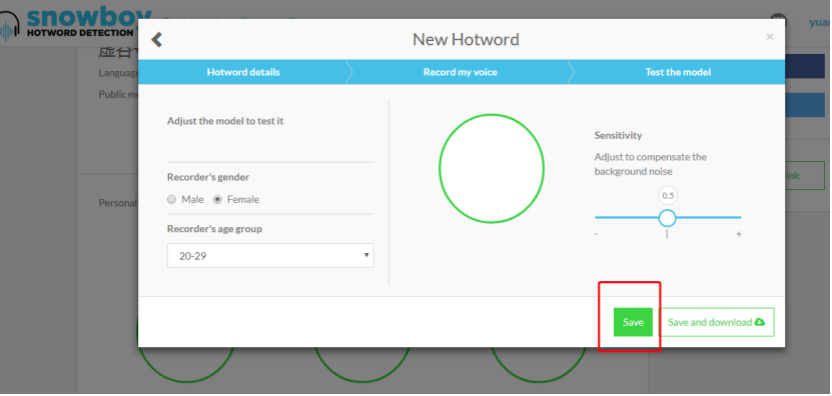

至此，snowboy在虚谷号上就可以完美的使用，有兴趣的人可以加一些自己的想要的功能。